In [1]:
!pip3 install textblob
!pip3 install tweepy
!pip3 install wordcloud
!pip3 install pandas
!pip3 install pycountry
!pip3 install langdetect
!pip3 install -U scikit-learn scipy matplotlib


  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [2]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


In [3]:
# Authentication
consumerKey = "KdKHvm2PSJ7rNawnAi9aDjmhv"
consumerSecret = "vtFitAzLvNYg9Fi6oNWdR2BoX1qOZZtuaABKnO5nOA9da0FIKj"
accessToken = "392725265-qFZlvvvf6Ewd271tSzBVXYkGtuNkU6VhY3XMYX4z"
accessTokenSecret = "keipCy36zDpCVISb5xTZ0hIF1GBbEHBkEhDJKBwgNQIo0"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [7]:
nltk.download('vader_lexicon')
#Sentiment Analysisdef percentage(part,whole):
def percentage(part,whole):
 return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
 
 print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
     negative_list.append(tweet.text)
     negative += 1
 elif pos > neg:
     positive_list.append(tweet.text)
     positive += 1
 elif pos == neg:
     neutral_list.append(tweet.text)
     neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\choud\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Please enter keyword or hashtag to search: RussiaUkraineCrisis
Please enter how many tweets to analyze: 100
RT @TragedyInChina1: 中国和俄罗斯不能互相汇款了？！#Kyiv #UkraineRussie #Ukraine #RussiaUkraineCrisis #Russia #俄罗斯 #乌克兰 #SWIFT 

所有乌克兰战争相关视频去咱们电报群看！ https…
RT @TragedyInChina1: 每人一万八，从罗马尼亚包机回国，还要赞美它，厉害了我的国！#中国 #撤侨 #中国人 #留学生 #Chinese #韭菜 #UkraineRussie #Ukraine #RussiaUkraineCrisis #Russia #俄罗斯…
RT @PolitiCrooks: There are currently 54 countries in Africa... Of these 54, ONLY ONE (Ethiopia) escaped colonisation by some of the curren…
RT @TragedyInChina1: 每人一万八，从罗马尼亚包机回国，还要赞美它，厉害了我的国！#中国 #撤侨 #中国人 #留学生 #Chinese #韭菜 #UkraineRussie #Ukraine #RussiaUkraineCrisis #Russia #俄罗斯…
@FirstSquawk Yes they should...the world is crazy 🤪 and we need a brave man like Putin...#RussiaUkraineCrisis… https://t.co/J16BhkSWwp
Elite Israeli Special Forces Joined Ukraine Armed Forces  https://t.co/EPvBJGMTuG
#RussianUkrainianWar… https://t.co/QqmTGIjFFk
#RussiaUkraineCrisis: Arounf 700 civilians are wounded, although th

RT @1stIndiaNews: यूक्रेन के राष्ट्रपति जेलेंस्की ने संभाली सेना की कमान, जेलेंस्की ने चीफ ऑफ जनरल स्टाफ का संभाला पद 
#RussiaUkraineCrisis…
But unfortunately I left my country due to fear of russia 
#RussiaUkraineCrisis 
#RussianUkrainianWar https://t.co/U9GwQQYjFQ
RT @Abhisaxena3690: In my latest for @CAPS_INDIA, I argue that Russian nuclear brinkmanship has taught nuclear pariah states to stay put wi…
RT @1stIndiaNews: रूस की सीक्रेट सर्विस का सनसनीखेज दावा, 'यूक्रेन ने मोसाद को दी पुतिन को मारने की सुपारी दी', इजरायल की खुफिया एजेंसी है…
RT @1stIndiaNews: रूस की सीक्रेट सर्विस का सनसनीखेज दावा, 'यूक्रेन ने मोसाद को दी पुतिन को मारने की सुपारी दी', इजरायल की खुफिया एजेंसी है…
રશિયાના વિદેશ મંત્રાલયનું મોટું નિવેદન, કહ્યું- બ્રિટન વિરુદ્ધ લેશે મોટું પગલું
#Russiaukrainecrisis
US, UK and EU are very kind when it comes to human rights, will they recognize Palestine? 
#RussiaUkraineCrisis
RT @1stIndiaNews: अमेरिकी राष्ट्रपति बाइडेन ने फेसबुक पर पुतिन को किया अनफ्रेंड, बाइडेन ने पुतिन को

In [8]:
#Number of Tweets (Total, Positive, Negative, Neutral)tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  18
negative number:  23
neutral number:  59


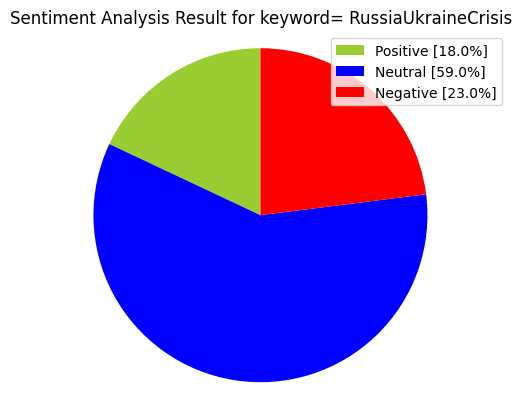

In [9]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()